# ANAC


#### imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

#### set seed

In [2]:
seed = 2024
np.random.seed(seed)

#### read in data

In [3]:
diet_csv = pd.read_csv("diet.csv").copy()
recipes_csv = pd.read_csv("recipes.csv").copy()
requests_csv = pd.read_csv("requests.csv").copy()
reviews_csv = pd.read_csv("reviews.csv").copy()

C:\Users\Maximilian Mittmann\AppData\Local\Temp\ipykernel_13932\3884275055.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_csv = pd.read_csv("reviews.csv").copy()


In [4]:
diet_csv.info() # 271907 entries
requests_csv.info() # 140195 entries
recipes_csv.info() #75604 entries
reviews_csv.info() # 140195 entries
# --> not all customers gave a review!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271907 entries, 0 to 271906
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AuthorId  271907 non-null  object
 1   Diet      271906 non-null  object
 2   Age       271907 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AuthorId      140195 non-null  object 
 1   RecipeId      140195 non-null  int64  
 2   Time          140195 non-null  float64
 3   HighCalories  140195 non-null  float64
 4   HighProtein   140195 non-null  object 
 5   LowFat        140195 non-null  int64  
 6   LowSugar      140195 non-null  object 
 7   HighFiber     140195 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFra

### Data Cleaning
#### diet_csv

In [5]:
#rename column
diet_csv.rename(columns= {"AuthorId" : "CustomerId"}, inplace=True)
# Change type of Diet into category
diet_csv["Diet"] = diet_csv["Diet"].astype("category")


In [6]:
# delete row with missing value for diet
diet_csv = diet_csv.dropna(axis="rows")

In [258]:
diet_csv

,CustomerId,Diet,Age
0,10000120E,Vegetarian,46
1,1000014D,Vegan,18
2,1000015A,Vegetarian,58
3,1000016E,Vegetarian,32
4,1000027E,Vegan,61
...,...,...,...
271902,999917E,Vegetarian,28
271903,999936C,Omnivore,22
271904,99993D,Vegetarian,58
271905,99994A,Vegetarian,18


#### recipes_csv

In [7]:
# Change type for Recipe Category
recipes_csv["RecipeCategory"] = recipes_csv["RecipeCategory"].astype("category")


In [260]:
# Add new column TotalTimeNeeded
recipes_csv["TotalTimeNeeded"] = recipes_csv["CookTime"] + recipes_csv["PrepTime"]
recipes_csv

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,TotalTimeNeeded
0,73440,Bow Ties With Broccoli Pesto,0,1800,Other,"c(""\""6\"""", ""\""2\"""", ""\""1 1/2\"""", ""\""1/4\"""", ""\...","c(""\""hazelnuts\"""", ""\""broccoli florets\"""", ""\""...",241.3,10.1,1.2,0.0,13.1,31.8,2.3,1.4,6.7,9.0,NaN,1800
1,365718,Cashew-chutney Rice,3600,600,Other,"c(""\""1\"""", ""\""3/4\"""", ""\""6\"""", ""\""5\"""", ""\""2\""...","c(""\""celery\"""", ""\""onion\"""", ""\""butter\"""", ""\""...",370.8,17.5,7.2,22.9,553.3,44.3,1.6,2.2,9.4,8.0,NaN,4200
2,141757,Copycat Taco Bell Nacho Fries BellGrande,3600,2700,Other,"c(""\""3\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""3\""...","c(""\""Copycat Taco Bell Seasoned Beef\"""", ""\""ye...",377.6,20.9,10.5,45.7,1501.8,36.6,3.8,6.1,12.9,8.0,NaN,6300
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,18000,1800,Other,"c(""\""2\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""unsalted butter\"""", ""\""yellow onion\"""", ""...",282.8,16.5,10.3,50.5,630.2,22.8,2.3,2.7,11.7,6.0,NaN,19800
4,180505,Cool & Crisp Citrus Chiffon Pie,3600,1800,Other,"c(""\""1\"""", ""\""1/4\"""", ""\""1/2\"""", ""\""1/2\"""", ""\...","c(""\""unflavored gelatin\"""", ""\""water\"""", ""\""su...",257.5,8.6,2.4,110.7,160.9,39.8,0.4,30.2,6.3,6.0,NaN,5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,253577,Frijoles Negros- Crock Pot Mexican Black Beans,43200,28800,Other,"c(""\""2\"""", ""\""6 -8\"""", ""\""5\"""", ""\""1/2\"""", ""\""...","c(""\""black beans\"""", ""\""water\"""", ""\""bay leave...",121.5,0.5,0.1,0.0,1175.1,22.2,7.8,0.6,7.9,NaN,NaN,72000
75600,267827,Moose Moussaka,3600,2700,Other,"c(""\""1\"""", ""\""6\"""", ""\""2\"""", ""\""2\"""", ""\""1/2\""...","c(""\""onion\"""", ""\""garlic cloves\"""", ""\""olive o...",652.2,25.8,10.7,197.9,435.5,51.9,7.5,7.2,50.1,NaN,NaN,6300
75601,266983,Cantonese Pepper Steak for Two (Or More),1800,900,Other,"c(""\""1/2\"""", ""\""1\"""", ""\""1/8\"""", ""\""1/8\"""", ""\...","c(""\""top round steak\"""", ""\""cornstarch\"""", ""\""...",223.9,9.2,3.6,78.3,725.9,7.3,1.1,1.7,26.7,2.0,NaN,2700
75602,253739,Coconut Cream Cooler,300,120,Other,"c(""\""1\"""", ""\""1\"""", ""\""1\"""", ""\""7 1/2\"""", ""\""1...","c(""\""cream of coconut\"""", ""\""water\"""")",2229.8,80.3,69.3,0.0,294.7,369.0,15.7,317.9,26.7,NaN,1 gallon,420


In [8]:
#drop recipeservings and yields and saturated + cholesterol + sodium + carbohydratecontent for now
recipes_csv = recipes_csv.drop("RecipeServings", axis=1)
recipes_csv = recipes_csv.drop("RecipeYield", axis=1)
recipes_csv = recipes_csv.drop("SaturatedFatContent", axis=1)
recipes_csv = recipes_csv.drop("CholesterolContent", axis=1)
recipes_csv = recipes_csv.drop("SodiumContent", axis=1)
recipes_csv = recipes_csv.drop("CarbohydrateContent", axis=1)
#also drop cook n preptime n quantities n parts
#recipes_csv = recipes_csv.drop("PrepTime", axis=1)
#recipes_csv = recipes_csv.drop("CookTime", axis=1)
recipes_csv = recipes_csv.drop("RecipeIngredientQuantities", axis=1)
recipes_csv = recipes_csv.drop("RecipeIngredientParts", axis=1)

In [9]:
# Get cook time mean without outliers
cooktime_without_outliers = recipes_csv[(recipes_csv["CookTime"] <= 100000)]
cooktime_mean = cooktime_without_outliers["CookTime"].mean().round().astype('int')
# Replace outliers with mean
recipes_csv["CookTime"] = np.where(recipes_csv["CookTime"] > 100000, cooktime_mean, recipes_csv["CookTime"])


In [10]:
# Get prep time mean without outliers
prep_without_outliers = recipes_csv[(recipes_csv["PrepTime"] <= 4000)]
preptime_mean = cooktime_without_outliers["PrepTime"].mean().round().astype('int')
# Replace outliers with mean
recipes_csv["PrepTime"] = np.where(recipes_csv["PrepTime"] > 4000, preptime_mean, recipes_csv["PrepTime"])

KeyError: 'Column not found: PrepTime'

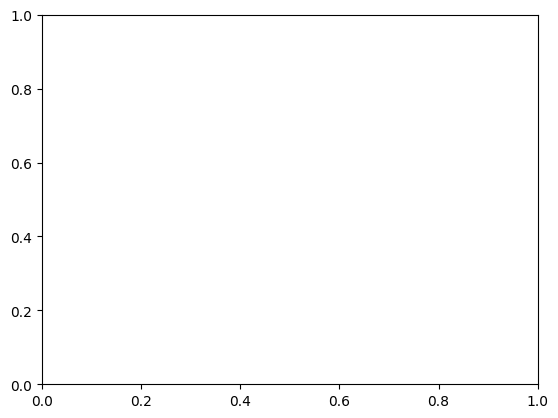

In [264]:
recipes_csv.boxplot(column=["PrepTime"], by="RecipeCategory")

<Axes: title={'center': 'TotalTimeNeeded'}, xlabel='RecipeCategory'>

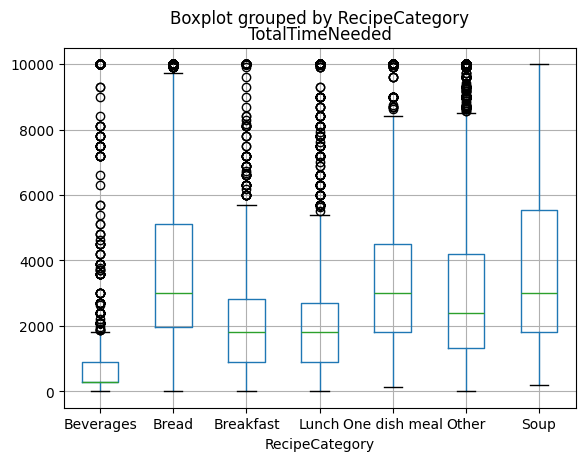

In [265]:
# Handle outliers (max values like 300000 for sodium content
#recipes_csv.boxplot(column=["SodiumContent"], by="RecipeCategory")
#recipes_csv.groupby("RecipeCategory").count()
#recipes_csv.boxplot(column=["TotalTimeNeeded"], by="RecipeCategory")
high_total_time = recipes_csv[(recipes_csv["TotalTimeNeeded"] > 10000)]
recipes_csv['TotalTimeNeeded'] = np.where(recipes_csv['TotalTimeNeeded'] > 10000, 10000, recipes_csv['TotalTimeNeeded'])
recipes_csv.boxplot(column=["TotalTimeNeeded"], by="RecipeCategory")

In [266]:
high_sodium = recipes_csv[recipes_csv["SodiumContent"] > 4000]
print(high_sodium['SodiumContent'].mean())
print(recipes_csv["SodiumContent"].mean())
normal_sodium = recipes_csv[(recipes_csv["SodiumContent"] <= 4000)]
print(normal_sodium["SodiumContent"].max())
normal_sodium_mean = normal_sodium["SodiumContent"].mean()
normal_sodium_mean

KeyError: 'SodiumContent'

In [267]:
recipes_csv

,RecipeId,Name,RecipeCategory,Calories,FatContent,FiberContent,SugarContent,ProteinContent,TotalTimeNeeded
0,73440,Bow Ties With Broccoli Pesto,Other,241.3,10.1,2.3,1.4,6.7,1800
1,365718,Cashew-chutney Rice,Other,370.8,17.5,1.6,2.2,9.4,4200
2,141757,Copycat Taco Bell Nacho Fries BellGrande,Other,377.6,20.9,3.8,6.1,12.9,6300
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,Other,282.8,16.5,2.3,2.7,11.7,10000
4,180505,Cool & Crisp Citrus Chiffon Pie,Other,257.5,8.6,0.4,30.2,6.3,5400
...,...,...,...,...,...,...,...,...,...
75599,253577,Frijoles Negros- Crock Pot Mexican Black Beans,Other,121.5,0.5,7.8,0.6,7.9,10000
75600,267827,Moose Moussaka,Other,652.2,25.8,7.5,7.2,50.1,6300
75601,266983,Cantonese Pepper Steak for Two (Or More),Other,223.9,9.2,1.1,1.7,26.7,2700
75602,253739,Coconut Cream Cooler,Other,2229.8,80.3,15.7,317.9,26.7,420


##### requests_csv

In [268]:
requests_csv

,AuthorId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
0,2001012259B,73440,1799.950949,0.0,Indifferent,0,0,0
1,437641B,365718,4201.820980,0.0,Yes,0,Indifferent,1
2,1803340263D,141757,6299.861496,0.0,Indifferent,1,Indifferent,0
3,854048B,280351,19801.365796,0.0,Yes,1,0,1
4,2277685E,180505,5400.093457,0.0,Indifferent,0,0,0
...,...,...,...,...,...,...,...,...
140190,163793B,78171,1560.649725,0.0,Indifferent,0,0,1
140191,33888B,333262,1502.011466,1.0,Indifferent,1,0,0
140192,401942C,49200,5999.274269,0.0,Indifferent,0,0,1
140193,346866B,214815,899.523513,0.0,Yes,1,Indifferent,1


In [11]:
#rename column
requests_csv.rename(columns= {"AuthorId" : "CustomerId"}, inplace=True)
# Map indifferent values for HighProtein and LowSugar
requests_csv["HighProtein"] = requests_csv["HighProtein"].map({
    "Indifferent": 0,
    "0": 0,
    "1": 1,
    "Yes": 1
})

requests_csv["LowSugar"] = requests_csv["LowSugar"].map({
    "Indifferent": 0,
    "0": 0,
    "1": 1
})


In [12]:
# Change types to boolean
requests_csv["HighCalories"] = requests_csv["HighCalories"].astype("bool")
requests_csv["LowFat"] = requests_csv["LowFat"].astype("bool")
requests_csv["HighFiber"] = requests_csv["HighFiber"].astype("bool")
requests_csv["HighProtein"] = requests_csv["HighProtein"].astype("bool")
requests_csv["LowSugar"] = requests_csv["LowSugar"].astype("bool")
requests_csv = requests_csv.drop(columns=["LowSugar"])

In [13]:
# Replace negative time requests with 0 and round time values to int
requests_csv['Time'] = np.where(requests_csv['Time'] < 0, 0, requests_csv['Time'])
requests_csv['Time'] = requests_csv['Time'].round().astype('int')
requests_csv.rename(columns={'Time':'RequestedTime'}, inplace=True)

In [272]:
requests_csv

,CustomerId,RecipeId,RequestedTime,HighCalories,HighProtein,LowFat,HighFiber
0,2001012259B,73440,1800,False,False,False,False
1,437641B,365718,4202,False,True,False,True
2,1803340263D,141757,6300,False,False,True,False
3,854048B,280351,19801,False,True,True,True
4,2277685E,180505,5400,False,False,False,False
...,...,...,...,...,...,...,...
140190,163793B,78171,1561,False,False,False,True
140191,33888B,333262,1502,True,False,True,False
140192,401942C,49200,5999,False,False,False,True
140193,346866B,214815,900,False,True,True,True


#### reviews_csv

In [273]:

# TODO why are there missing values for TestSetId? 

In [14]:
# Rename column
reviews_csv.rename(columns= {"AuthorId" : "CustomerId"}, inplace=True)
# Remove NA rows and Rating column and TestSetId
reviews_csv = reviews_csv.drop("Rating", axis=1)
reviews_csv.dropna(subset=["Like"], inplace=True) # note: now the entries are reduced to 97381 entries
reviews_csv = reviews_csv.drop("TestSetId", axis=1)

In [15]:
# convert Like type to boolean
reviews_csv["Like"] = reviews_csv["Like"].astype("boolean")

In [276]:
reviews_csv

,CustomerId,RecipeId,Like
42814,1000036C,320576,False
42815,1000216B,189335,False
42816,1000221A,133043,False
42817,1000221A,90537,False
42818,1000221A,334314,False
...,...,...,...
140190,999595E,338070,False
140191,999774A,29002,False
140192,999774A,159252,False
140193,999774A,1171,True


#### Join the tables

In [277]:
requests_csv

,CustomerId,RecipeId,RequestedTime,HighCalories,HighProtein,LowFat,HighFiber
0,2001012259B,73440,1800,False,False,False,False
1,437641B,365718,4202,False,True,False,True
2,1803340263D,141757,6300,False,False,True,False
3,854048B,280351,19801,False,True,True,True
4,2277685E,180505,5400,False,False,False,False
...,...,...,...,...,...,...,...
140190,163793B,78171,1561,False,False,False,True
140191,33888B,333262,1502,True,False,True,False
140192,401942C,49200,5999,False,False,False,True
140193,346866B,214815,900,False,True,True,True


In [16]:
# merge diet + request
request_with_diet = pd.merge(diet_csv, requests_csv, how="inner", on="CustomerId")
request_with_diet

,CustomerId,Diet,Age,RecipeId,RequestedTime,HighCalories,HighProtein,LowFat,HighFiber
0,1000036C,Vegetarian,50,320576,119,False,False,False,True
1,1000216B,Vegetarian,78,189335,1199,False,True,False,True
2,1000221A,Vegetarian,25,133043,362,False,True,False,True
3,1000221A,Vegetarian,25,90537,1199,False,True,False,True
4,1000221A,Vegetarian,25,334314,5400,True,False,False,False
...,...,...,...,...,...,...,...,...,...
140190,999774A,Vegetarian,57,29002,2402,False,False,False,False
140191,999774A,Vegetarian,57,159252,6000,False,True,False,False
140192,999774A,Vegetarian,57,1171,480,True,True,False,False
140193,999917E,Vegetarian,28,169413,3600,False,False,False,False


In [17]:
# merge diet + request + recipe
request_with_diet_and_recipe = pd.merge(recipes_csv, request_with_diet, how="inner", on="RecipeId")
request_with_diet_and_recipe

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,Calories,FatContent,FiberContent,SugarContent,ProteinContent,CustomerId,Diet,Age,RequestedTime,HighCalories,HighProtein,LowFat,HighFiber
0,73440,Bow Ties With Broccoli Pesto,0,1800,Other,241.3,10.1,2.3,1.4,6.7,1073154D,Vegetarian,59,1800,False,False,True,True
1,73440,Bow Ties With Broccoli Pesto,0,1800,Other,241.3,10.1,2.3,1.4,6.7,1134684A,Vegan,70,1799,False,False,False,False
2,73440,Bow Ties With Broccoli Pesto,0,1800,Other,241.3,10.1,2.3,1.4,6.7,120376D,Vegetarian,21,1799,False,True,False,False
3,73440,Bow Ties With Broccoli Pesto,0,1800,Other,241.3,10.1,2.3,1.4,6.7,1208183D,Vegan,65,1801,True,False,False,False
4,73440,Bow Ties With Broccoli Pesto,0,1800,Other,241.3,10.1,2.3,1.4,6.7,1302995D,Vegan,65,1800,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140190,253577,Frijoles Negros- Crock Pot Mexican Black Beans,43200,3028,Other,121.5,0.5,7.8,0.6,7.9,1677720D,Vegan,27,71999,False,False,True,True
140191,267827,Moose Moussaka,3600,2700,Other,652.2,25.8,7.5,7.2,50.1,853126B,Vegetarian,63,6299,False,True,True,False
140192,266983,Cantonese Pepper Steak for Two (Or More),1800,900,Other,223.9,9.2,1.1,1.7,26.7,2000154789A,Omnivore,78,2701,False,True,False,True
140193,253739,Coconut Cream Cooler,300,120,Other,2229.8,80.3,15.7,317.9,26.7,499207A,Vegetarian,19,420,True,False,False,False


In [19]:
# merge diet + request + recipe + review
request_with_diet_recipe_and_review = pd.merge(reviews_csv, request_with_diet_and_recipe, how="inner", on=["CustomerId", "RecipeId"])

request_with_diet_recipe_and_review

,CustomerId,RecipeId,Like,Name,CookTime,PrepTime,RecipeCategory,Calories,FatContent,FiberContent,SugarContent,ProteinContent,Diet,Age,RequestedTime,HighCalories,HighProtein,LowFat,HighFiber
0,1000036C,320576,False,Downeaster,0,120,Beverages,138.7,0.0,0.0,0.0,0.0,Vegetarian,50,119,False,False,False,True
1,1000216B,189335,False,Thai Rice Soup (Kao Tome Gai),600,600,Other,395.7,19.2,0.8,4.3,16.3,Vegetarian,78,1199,False,True,False,True
2,1000221A,133043,False,Lemon and Thyme Marinade for Poultry,60,300,Other,125.6,13.5,0.4,0.4,0.2,Vegetarian,25,362,False,True,False,True
3,1000221A,90537,False,Black Bean Salsa,0,1200,Breakfast,1590.1,49.0,69.4,15.7,68.9,Vegetarian,25,1199,False,True,False,True
4,1000221A,334314,False,Irish Soda Bread,3600,1800,Bread,770.9,11.0,4.5,71.1,18.1,Vegetarian,25,5400,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97376,999595E,338070,False,Pumpkin Cake Mix Dessert,3000,900,Other,464.3,31.4,1.4,27.3,5.2,Vegetarian,31,3899,False,False,True,False
97377,999774A,29002,False,Summer Corkscrew Pasta,1200,1200,Other,838.5,33.3,10.3,13.5,32.0,Vegetarian,57,2402,False,False,False,False
97378,999774A,159252,False,"Chili, Kaffir Lime and Lemongrass Jelly",4800,1200,Other,928.0,0.6,7.0,229.8,1.1,Vegetarian,57,6000,False,True,False,False
97379,999774A,1171,True,Kahlua Hot Chocolate,360,120,Beverages,665.9,19.8,4.0,57.8,18.2,Vegetarian,57,480,True,True,False,False


In [ ]:

# add Column for the difference between RequestedTime and TotalTimeNeeded
request_with_diet_recipe_and_review["TimeDifference"] = request_with_diet_recipe_and_review['RequestedTime'] - request_with_diet_recipe_and_review['TotalTimeNeeded']

In [20]:
# One hot encoding for categorical variables
df = pd.get_dummies(request_with_diet_recipe_and_review, columns=["Diet", "RecipeCategory"], drop_first=True)

In [21]:
# Split dataset into train and test df
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.20, stratify=request_with_diet_recipe_and_review['Like'], random_state=seed)

In [283]:
request_with_diet_recipe_and_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97381 entries, 0 to 97380
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       97381 non-null  object  
 1   RecipeId         97381 non-null  int64   
 2   Like             97381 non-null  boolean 
 3   Name             97381 non-null  object  
 4   RecipeCategory   97381 non-null  category
 5   Calories         97381 non-null  float64 
 6   FatContent       97381 non-null  float64 
 7   FiberContent     97381 non-null  float64 
 8   SugarContent     97381 non-null  float64 
 9   ProteinContent   97381 non-null  float64 
 10  TotalTimeNeeded  97381 non-null  int64   
 11  Diet             97381 non-null  category
 12  Age              97381 non-null  int64   
 13  RequestedTime    97381 non-null  int32   
 14  HighCalories     97381 non-null  bool    
 15  HighProtein      97381 non-null  bool    
 16  LowFat           97381 non-null  bool   

***Train Model***


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score
                                              
train_model = RandomForestClassifier(n_estimators=10, max_features=4, random_state=seed)

X = train_df.drop(columns=["Like", "CustomerId", "RecipeId", "Name"])
y = train_df["Like"]

train_model.fit(X,y)

# Calculate balanced accuracy
pred = train_model.predict(X)
score = np.mean(cross_val_score(train_model, X, y, cv=4, scoring="balanced_accuracy"))
print("Cross validation score for balanced accuracy: " + str(score))

# Report scores on model
y_pred = train_model.predict(X)
print("Precision:", precision_score(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("Balanced Accuracy", balanced_accuracy_score(y, y_pred))


Cross validation score for balanced accuracy: 0.630873492999988
Precision: 0.9971575955363723
Accuracy: 0.988999281166564
Recall: 0.9194331197825665
Balanced Accuracy 0.9595168616575032


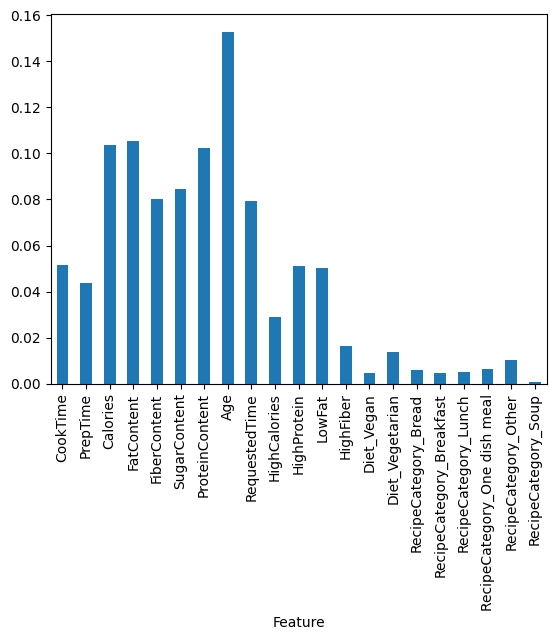

In [23]:
# Plot feature importance 

importance_values = train_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_values})
imp_plot = importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
imp_plot.plot()
plt.show()

***Test Model***

In [24]:
test_df = test_df.drop(columns=["CustomerId", "RecipeId", "Name"])

In [25]:
test_predictions = train_model.predict(test_df.drop(columns=['Like']))
test_probabilities = train_model.predict_proba(test_df.drop(columns=['Like']))

test_predictions_df = pd.DataFrame({'Like': test_df['Like'], 
                                     'Predicted_Like': test_predictions,
                                     'Probability_Like=0': test_probabilities[:, 0],
                                     'Probability_Like=1': test_probabilities[:, 1]})
print(test_predictions_df)


# Confusion Matrix
conf_matrix = confusion_matrix(test_df['Like'], test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, accuracy, recall
print("Test-Precision:", precision_score(test_df['Like'], test_predictions))
print("Test-Accuracy:", accuracy_score(test_df['Like'], test_predictions))
print("Test-Recall:", recall_score(test_df['Like'], test_predictions))
print("Test Balanced Accuracy:", balanced_accuracy_score(test_df["Like"], test_predictions))

        Like  Predicted_Like  Probability_Like=0  Probability_Like=1
25046  False             0.0                 0.9                 0.1
40124   True             0.0                 1.0                 0.0
49430  False             0.0                 1.0                 0.0
71939  False             0.0                 0.9                 0.1
630    False             0.0                 1.0                 0.0
...      ...             ...                 ...                 ...
91766  False             0.0                 1.0                 0.0
27153  False             0.0                 0.9                 0.1
51545  False             0.0                 1.0                 0.0
25071  False             0.0                 1.0                 0.0
59952  False             0.0                 0.9                 0.1

[19477 rows x 4 columns]
Confusion Matrix:
[[16509   392]
 [ 1790   786]]
Test-Precision: 0.66723259762309
Test-Accuracy: 0.8879704266570827
Test-Recall: 0.305124223602484


#### 1. Logistic Regression
#### 2. Decision Trees
#### 3. Random Forest
#### 4. Naive bayes
#### 5. Gradient Boosting

#### 1. Data Cleaning (missing values, merge tables)
#### 2. Set dataset into training & testing sets + download testing set
#### 3. modeling
#### 4. Model training: train model on training dataset
#### 5. Model evaluation (performance)
#### 6. prediction on the unseen data